Data source: https://www.kaggle.com/c/tmdb-box-office-prediction/data

# Problem statement

In a world… where movies made an estimated $41.7 billion in 2018, the film industry is more popular than ever. But what movies make the most money at the box office? How much does a director matter? Or the budget? For some movies, it's "You had me at 'Hello.'" For others, the trailer falls short of expectations and you think "What we have here is a failure to communicate."

We are presented with metadata on over 7,000 past films from The Movie Database to try and predict their overall worldwide box office revenue. Data points provided include cast, crew, plot keywords, budget, posters, release dates, languages, production companies, and countries.

# Data description

In this dataset, we are provided with 7398 movies and a variety of metadata obtained from The Movie Database (TMDB). Movies are labeled with id. Data points include cast, crew, plot keywords, budget, posters, release dates, languages, production companies, and countries.

We are predicting the worldwide revenue for 3000 movies in the test file.

Note - many movies are remade over the years, therefore it may seem like multiple instance of a movie may appear in the data, however they are different and should be considered separate movies. In addition, some movies may share a title, but be entirely unrelated.

E.g. The Karate Kid (id: 5266) was released in 1986, while a clearly (or maybe just subjectively) inferior remake (id: 1987) was released in 2010. Also, while the Frozen (id: 5295) released by Disney in 2013 may be the household name, don't forget about the less-popular Frozen (id: 139) released three years earlier about skiers who are stranded on a chairlift...

## Loading the dataset 

In [ ]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
%matplotlib inline

In [ ]:
box_office = pd.read_csv("C:/Users/Hp/Desktop/EHC/test.csv")
box_office = pd.read_csv("C:/Users/Hp/Desktop/EHC/train.csv")

In [ ]:
# Prints the first five rows and columns
box_office.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


In [ ]:
# Prints the last five rows and columns
box_office.tail()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
2995,2996,NaN,0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",NaN,tt0109403,en,Chasers,Military men Rock Reilly and Eddie Devane are ...,9.853270,...,4/22/94,102.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It was supposed to be a routine prisoner trans...,Chasers,"[{'id': 378, 'name': 'prison'}, {'id': 572, 'n...","[{'cast_id': 2, 'character': 'Rock Reilly', 'c...","[{'credit_id': '52fe4494c3a368484e02ac7d', 'de...",1596687
2996,2997,NaN,0,"[{'id': 18, 'name': 'Drama'}, {'id': 10402, 'n...",NaN,tt2364975,sv,Vi är bäst!,Three girls in 1980s Stockholm decide to form ...,3.727996,...,3/28/13,102.0,"[{'iso_639_1': 'sv', 'name': 'svenska'}]",Released,NaN,We Are the Best!,"[{'id': 1192, 'name': 'sweden'}, {'id': 4470, ...","[{'cast_id': 5, 'character': 'Bobo', 'credit_i...","[{'credit_id': '5716b72ac3a3686678012c84', 'de...",180590
2997,2998,NaN,65000000,"[{'id': 80, 'name': 'Crime'}, {'id': 28, 'name...",NaN,tt0116908,en,The Long Kiss Goodnight,"Samantha Caine, suburban homemaker, is the ide...",14.482345,...,10/11/96,120.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,What's forgotten is not always gone.,The Long Kiss Goodnight,"[{'id': 441, 'name': 'assassination'}, {'id': ...","[{'cast_id': 10, 'character': 'Samantha Caine ...","[{'credit_id': '52fe443a9251416c7502d579', 'de...",89456761
2998,2999,NaN,42000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 10749, '...",http://www.alongcamepolly.com/,tt0343135,en,Along Came Polly,Reuben Feffer is a guy who's spent his entire ...,15.725542,...,1/16/04,90.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,"For the most cautious man on Earth, life is ab...",Along Came Polly,"[{'id': 966, 'name': 'beach'}, {'id': 2676, 'n...","[{'cast_id': 8, 'character': 'Reuben Feffer', ...","[{'credit_id': '556f817b9251410866000a63', 'de...",171963386
2999,3000,NaN,35000000,"[{'id': 53, 'name': 'Thriller'}, {'id': 28, 'n...",http://www.abductionthefilm.com/,tt1600195,en,Abduction,A young man sets out to uncover the truth abou...,10.512109,...,9/22/11,106.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,They stole his life. He's taking it back.,Abduction,"[{'id': 591, 'name': 'cia'}, {'id': 822, 'name...","[{'cast_id': 2, 'character': 'Nathan Harper', ...","[{'credit_id': '5391990d0e0a260fb5001629', 'de...",82087155


To know the statistical distribution we use the describe(), we added "all" to make sure it captures all categorical variables of the dataset while bringing out it's statistical distribution.From the details we have:
Count reveals the number of not empty values
mean reveals the average (mean)
min shows the minimum values
25% is the 25% percentiles
50% shows the 50% percentiles 
75%shows the 75% percentiles
max shows the maximum valuse 

In [ ]:
box_office.describe(include='all')

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
count,3000.000000,604,3.000000e+03,2993,946,3000,3000,3000,2992,3000.000000,...,3000,2998.000000,2980,3000,2403,3000,2724,2987,2984,3.000000e+03
unique,NaN,422,NaN,872,941,3000,36,2975,2992,NaN,...,2398,NaN,401,2,2400,2969,2648,2975,2984,NaN
top,NaN,"[{'id': 645, 'name': 'James Bond Collection', ...",NaN,"[{'id': 18, 'name': 'Drama'}]",http://www.transformersmovie.com/,tt2637294,en,Joshua,"When Lou, who has become the ""father of the In...",NaN,...,9/10/10,NaN,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Based on a true story.,The Magnificent Seven,"[{'id': 10183, 'name': 'independent film'}]",[],"[{'credit_id': '59ac067c92514107af02c8c8', 'de...",NaN
freq,NaN,16,NaN,266,4,1,2575,2,1,NaN,...,5,NaN,1817,2996,3,2,27,13,1,NaN
mean,1500.500000,NaN,2.253133e+07,NaN,NaN,NaN,NaN,NaN,NaN,8.463274,...,NaN,107.856571,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.672585e+07
std,866.169729,NaN,3.702609e+07,NaN,NaN,NaN,NaN,NaN,NaN,12.104000,...,NaN,22.086434,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.375323e+08
min,1.000000,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,0.000001,...,NaN,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.000000e+00
25%,750.750000,NaN,0.000000e+00,NaN,NaN,NaN,NaN,NaN,NaN,4.018053,...,NaN,94.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2.379808e+06
50%,1500.500000,NaN,8.000000e+06,NaN,NaN,NaN,NaN,NaN,NaN,7.374861,...,NaN,104.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.680707e+07
75%,2250.250000,NaN,2.900000e+07,NaN,NaN,NaN,NaN,NaN,NaN,10.890983,...,NaN,118.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6.891920e+07


In [ ]:
# Prints the number of rows and columns
box_office.shape

(3000, 23)

In [ ]:
# Checks for duplicates
box_office.drop_duplicates(keep='first', inplace=True)
#There are no duplicates in this dataset
box_office.shape

(3000, 23)

In [ ]:
# Returns information about the dataset
box_office.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3000 entries, 0 to 2999
Data columns (total 23 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     3000 non-null   int64  
 1   belongs_to_collection  604 non-null    object 
 2   budget                 3000 non-null   int64  
 3   genres                 2993 non-null   object 
 4   homepage               946 non-null    object 
 5   imdb_id                3000 non-null   object 
 6   original_language      3000 non-null   object 
 7   original_title         3000 non-null   object 
 8   overview               2992 non-null   object 
 9   popularity             3000 non-null   float64
 10  poster_path            2999 non-null   object 
 11  production_companies   2844 non-null   object 
 12  production_countries   2945 non-null   object 
 13  release_date           3000 non-null   object 
 14  runtime                2998 non-null   float64
 15  spok

We checked if there were any missing values in our dataset and there were quite a lot of them, which we will handle while cleaning our data.

In [ ]:
box_office.isnull().sum()

id                          0
belongs_to_collection    2396
budget                      0
genres                      7
homepage                 2054
imdb_id                     0
original_language           0
original_title              0
overview                    8
popularity                  0
poster_path                 1
production_companies      156
production_countries       55
release_date                0
runtime                     2
spoken_languages           20
status                      0
tagline                   597
title                       0
Keywords                  276
cast                       13
crew                       16
revenue                     0
dtype: int64

## Data Cleaning / Exploratory data analysis


In [ ]:
box_office.describe()

,id,budget,popularity,runtime,revenue
count,3000.000000,3.000000e+03,3000.000000,2998.000000,3.000000e+03
mean,1500.500000,2.253133e+07,8.463274,107.856571,6.672585e+07
std,866.169729,3.702609e+07,12.104000,22.086434,1.375323e+08
min,1.000000,0.000000e+00,0.000001,0.000000,1.000000e+00
25%,750.750000,0.000000e+00,4.018053,94.000000,2.379808e+06
50%,1500.500000,8.000000e+06,7.374861,104.000000,1.680707e+07
75%,2250.250000,2.900000e+07,10.890983,118.000000,6.891920e+07
max,3000.000000,3.800000e+08,294.337037,338.000000,1.519558e+09


In [ ]:
box_office.head()

,id,belongs_to_collection,budget,genres,homepage,imdb_id,original_language,original_title,overview,popularity,...,release_date,runtime,spoken_languages,status,tagline,title,Keywords,cast,crew,revenue
0,1,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000,"[{'id': 35, 'name': 'Comedy'}]",NaN,tt2637294,en,Hot Tub Time Machine 2,"When Lou, who has become the ""father of the In...",6.575393,...,2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Laws of Space and Time are About to be Vio...,Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,2,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",NaN,tt0368933,en,The Princess Diaries 2: Royal Engagement,Mia Thermopolis is now a college graduate and ...,8.248895,...,8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,It can take a lifetime to find true love; she'...,The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,3,NaN,3300000,"[{'id': 18, 'name': 'Drama'}]",http://sonyclassics.com/whiplash/,tt2582802,en,Whiplash,"Under the direction of a ruthless instructor, ...",64.299990,...,10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The road to greatness can take you to the edge.,Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,4,NaN,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",http://kahaanithefilm.com/,tt1821480,hi,Kahaani,Vidya Bagchi (Vidya Balan) arrives in Kolkata ...,3.174936,...,3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,NaN,Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,5,NaN,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",NaN,tt1380152,ko,마린보이,Marine Boy is the story of a former national s...,1.148070,...,2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,NaN,Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970


We dropped some columns that weren't so necessary and trained our model using the ones we thought were most important.

In [ ]:
box_office = box_office.drop(columns=['id','belongs_to_collection','homepage','original_title','poster_path','production_companies','overview','imdb_id','production_countries','tagline','Keywords','cast','crew'], axis=1)

In [ ]:
# Prints the columns available
box_office.columns

Index(['budget', 'genres', 'original_language', 'popularity', 'release_date',
       'runtime', 'spoken_languages', 'status', 'title', 'revenue'],
      dtype='object')

The 'release_date' column is a date time object and it was read as a string object which so we converted it to a date time object using Pandas 'pd.to_datetime()'. Then we added the columns for the day, month and year. After which we dropped the 'release_date' column as it was no longer relevant.

In [ ]:
box_office['release_date'] = pd.to_datetime(box_office['release_date'])

In [ ]:
box_office['day'] = box_office['release_date'].dt.day

In [ ]:
box_office['month'] = box_office['release_date'].dt.month

In [ ]:
box_office['year'] = box_office['release_date'].dt.year

In [ ]:
box_office = box_office.drop(['release_date'], axis=1)

In [ ]:
box_office.head()

,budget,genres,original_language,popularity,runtime,spoken_languages,status,title,revenue,day,month,year
0,14000000,"[{'id': 35, 'name': 'Comedy'}]",en,6.575393,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Hot Tub Time Machine 2,12314651,20,2,2015
1,40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",en,8.248895,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Princess Diaries 2: Royal Engagement,95149435,6,8,2004
2,3300000,"[{'id': 18, 'name': 'Drama'}]",en,64.299990,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Whiplash,13092000,10,10,2014
3,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",hi,3.174936,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Kahaani,16000000,9,3,2012
4,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",ko,1.148070,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,Marine Boy,3923970,5,2,2009


After dropping some columns we still have a few columns with missing values so we filled those columns using either their mean or mode.

In [ ]:
box_office.isna().sum()

budget                0
genres                7
original_language     0
popularity            0
runtime               2
spoken_languages     20
status                0
title                 0
revenue               0
day                   0
month                 0
year                  0
dtype: int64

In [ ]:
box_office['genres'].mode()[0]

"[{'id': 18, 'name': 'Drama'}]"

In [ ]:
box_office['genres'].fillna(box_office['genres'].mode()[0], inplace=True )

In [ ]:
box_office['runtime'].mean()

107.85657104736491

In [ ]:
box_office['runtime'].fillna(box_office['runtime'].mean(), inplace=True)

In [ ]:
box_office['spoken_languages'].mode()[0]

"[{'iso_639_1': 'en', 'name': 'English'}]"

In [ ]:
box_office['spoken_languages'].fillna(box_office['spoken_languages'].mode()[0], inplace=True)

In [ ]:
box_office.isna().sum()

budget               0
genres               0
original_language    0
popularity           0
runtime              0
spoken_languages     0
status               0
title                0
revenue              0
day                  0
month                0
year                 0
dtype: int64

In [ ]:
box_office.describe()

,budget,popularity,runtime,revenue,day,month,year
count,3.000000e+03,3000.000000,3000.000000,3.000000e+03,3000.000000,3000.000000,3000.000000
mean,2.253133e+07,8.463274,107.856571,6.672585e+07,15.046333,6.775333,2005.313000
std,3.702609e+07,12.104000,22.079069,1.375323e+08,8.632981,3.409115,16.182531
min,0.000000e+00,0.000001,0.000000,1.000000e+00,1.000000,1.000000,1972.000000
25%,0.000000e+00,4.018053,94.000000,2.379808e+06,8.000000,4.000000,1996.000000
50%,8.000000e+06,7.374861,104.000000,1.680707e+07,15.000000,7.000000,2006.000000
75%,2.900000e+07,10.890983,118.000000,6.891920e+07,22.000000,10.000000,2012.000000
max,3.800000e+08,294.337037,338.000000,1.519558e+09,31.000000,12.000000,2071.000000


In [ ]:
box_office['revenue'].describe()

count    3.000000e+03
mean     6.672585e+07
std      1.375323e+08
min      1.000000e+00
25%      2.379808e+06
50%      1.680707e+07
75%      6.891920e+07
max      1.519558e+09
Name: revenue, dtype: float64

In [ ]:
#10 most popular revenue for movies

box_office['revenue'].value_counts().sort_values(ascending=False).head(5) 

6000000     10
11000000    10
10000000     9
500000       8
12000000     6
Name: revenue, dtype: int64

In [ ]:
box_office['revenue'].unique()

array([ 12314651,  95149435,  13092000, ...,  89456761, 171963386,
        82087155], dtype=int64)

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='revenue', ylabel='count'>

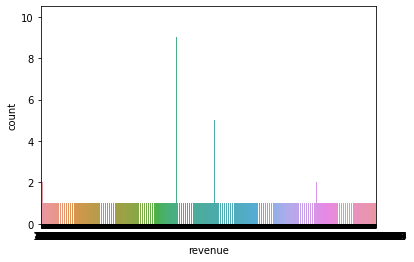

In [ ]:
sns.countplot('revenue',data=box_office)

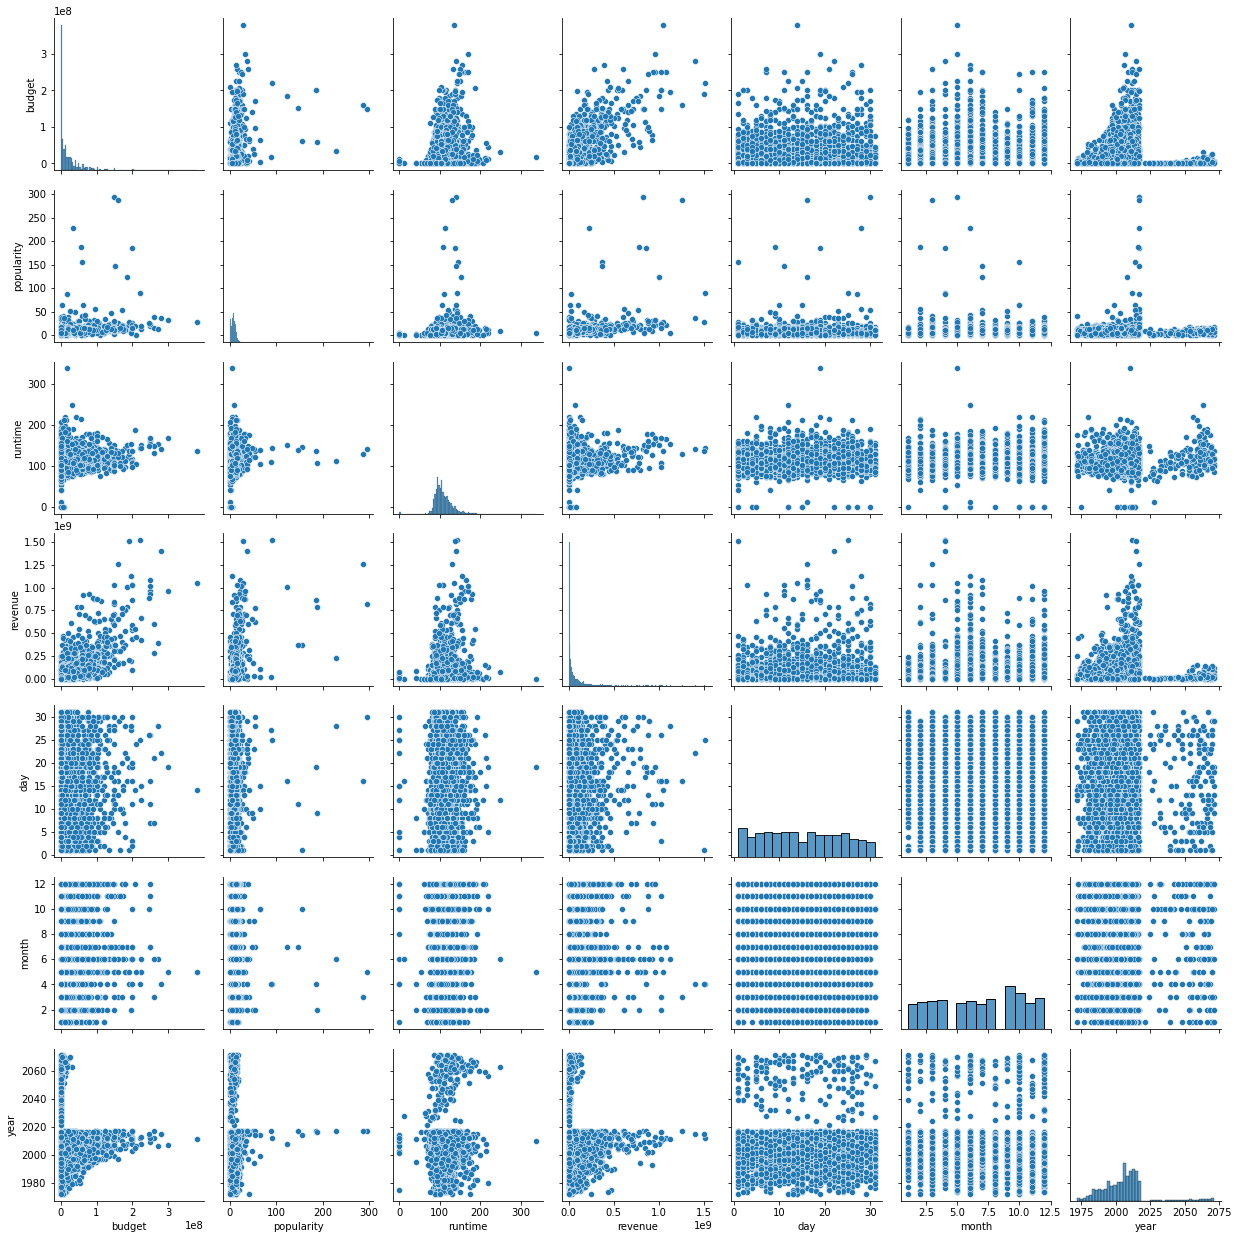

In [ ]:
sns.pairplot(box_office)

## Encoding

We converted our alphabetical data which were in string format to numbers by encoding them using the LabelEncoder.
Encoding means to represent a unicode string as a string of bytes. 
We converted the alphabetical data to numerical data using the label enconder.

In [ ]:
from sklearn.preprocessing import LabelEncoder

In [ ]:
tmdb = LabelEncoder()

In [ ]:
box_office.head()

,budget,genres,original_language,popularity,runtime,spoken_languages,status,title,revenue,day,month,year
0,14000000,"[{'id': 35, 'name': 'Comedy'}]",en,6.575393,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Hot Tub Time Machine 2,12314651,20,2,2015
1,40000000,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",en,8.248895,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,The Princess Diaries 2: Royal Engagement,95149435,6,8,2004
2,3300000,"[{'id': 18, 'name': 'Drama'}]",en,64.299990,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Released,Whiplash,13092000,10,10,2014
3,1200000,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",hi,3.174936,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Released,Kahaani,16000000,9,3,2012
4,0,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",ko,1.148070,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Released,Marine Boy,3923970,5,2,2009


In [ ]:
# This transforms the categorical column into numbers
box_office['genres'] = tmdb.fit_transform(box_office['genres'])
box_office['original_language'] = tmdb.fit_transform(box_office['original_language'])
box_office['spoken_languages'] = tmdb.fit_transform(box_office['spoken_languages'])
box_office['status'] = tmdb.fit_transform(box_office['status'])
box_office['title'] = tmdb.fit_transform(box_office['title'])

In [ ]:
box_office.head()

,budget,genres,original_language,popularity,runtime,spoken_languages,status,title,revenue,day,month,year
0,14000000,696,7,6.575393,93.0,262,0,1045,12314651,20,2,2015
1,40000000,645,7,8.248895,113.0,262,0,2546,95149435,6,8,2004
2,3300000,391,7,64.299990,105.0,262,0,2903,13092000,10,10,2014
3,1200000,733,13,3.174936,122.0,175,0,1183,16000000,9,3,2012
4,0,589,18,1.148070,118.0,338,0,1371,3923970,5,2,2009


## Training the dataset

We dropped the column "revenue" which we are predict into 'y' as we are to use the 'X'dataset in training our model. We cannot train our model while it contains the predicted column otherwise there won't be data available for the model to predict.

In [ ]:
X = box_office.drop(columns=['revenue'], axis=1)
y = box_office['revenue']

In [ ]:
X.head()

,budget,genres,original_language,popularity,runtime,spoken_languages,status,title,day,month,year
0,14000000,696,7,6.575393,93.0,262,0,1045,20,2,2015
1,40000000,645,7,8.248895,113.0,262,0,2546,6,8,2004
2,3300000,391,7,64.299990,105.0,262,0,2903,10,10,2014
3,1200000,733,13,3.174936,122.0,175,0,1183,9,3,2012
4,0,589,18,1.148070,118.0,338,0,1371,5,2,2009


In [ ]:
y.head()

0    12314651
1    95149435
2    13092000
3    16000000
4     3923970
Name: revenue, dtype: int64

After which we splitted our dataset into training and testing data because we don't want our model to see the data on which it will be tested on. We want to train our model to predict values on which it wasn't trained as this will enable it predict more accurate results.
We are to predict revenue which contains continuous values which means we are working on a regression problem. 
 
 To split our dataset we imported "train_test_split" and to train and test our model we imported "LinearRegression", both from the sckit library using sklearn.

In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

In [ ]:
model = LinearRegression()

Now that we have splitted our data into train and test and determined what type of model we are working on i.e if it is a classification or regression problem, we allocated 40% of our dataset to train our model and we set the random_state so the result is the same every time we run the code, else the train and test datasets would have different values each time. Then we checked the train and test data size.

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.4, random_state = 16)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(1200, 11) (1800, 11) (1200,) (1800,)


In [ ]:
model.fit(X_train, y_train) 

LinearRegression()

We predicted our model on data which it has not seen before

In [ ]:
y_pred = model.predict(X_test)
print(y_pred)

[-2955343.08640701 -3959690.50984687 -1319347.75773656 ...
 -4219807.76110005 -6666785.95858735 15524252.54888988]


The explained variance score explains the dispersion of errors of a given dataset. The variance is a measure of how far observed values differ from the average of predicted values i.e their difference from the predicted value mean. The goal is to have a value that is low.

In [ ]:
from sklearn.metrics import explained_variance_score

In [ ]:
explained_variance_score(y_test, y_pred)

0.6511165335905115

Mean Squared Error(MSE) is the average of the square of errors i.e the difference between the expected values and the predicted value.
Root Mean Squared Error(RMSE) is the square root of MSE, which means that the units of RMSE are the same as the original units of the target value that is being predicted.

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
np.sqrt(mean_squared_error(y_test, y_pred))

79692728.6928988

In [ ]:
error = mean_squared_error(y_test, y_pred)
print(error)

6350931006519976.0


In [ ]:
# This is the MSE modified to calculated to  RMSE by setting the "squared" argument to False
error = mean_squared_error(y_test, y_pred, squared = False)
print(error)

79692728.6928988


"multioutput" defines aggregating of multiple output scores. 
'raw_values' returns a full set of scores in case of multioutput input
'uniform_average' returns the average scores of all output with uniform weight

In [ ]:
error = mean_squared_error(y_test, y_pred, multioutput = 'raw_values')
print(error)

[6.35093101e+15]


In [ ]:
error = mean_squared_error(y_test, y_pred, multioutput = 'uniform_average')
print(error)

6350931006519976.0


In [ ]:
from sklearn.metrics import mean_absolute_error

In [ ]:
error = mean_absolute_error(y_test, y_pred)
print(error)

44789941.006416544


r2_score according to wikipedia is the proportion of the variance in the dependent variables that is predictable from the independent variables

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
print('R2 score: %.2f' %r2_score (y_test, y_pred))

R2 score: 0.65


In [ ]:
error = r2_score(y_test, y_pred)
print(error)

0.6509721548670406


In summary,Our Dataset is a categorical Dataset and it contains the following collumns:ID of the movies,the collection types,Genre of the movie,IMbid,Original langauge it was scrippted,Title,Overview Popularity,Tagline,Title,KeyWord CAST and Crew of the Box Office collumn

The graphs plotted were a countplot  to show the correlation points between the data points,showing the total revenue annually.

A pairwise plot to show correlations of the revenue,runtime and population.

Findings and Recommendations.
The annual minimum runtime for movies is 1000000e+03 of budget
The most spoken language is English
The year with the highest production is 2013
The year with highest Revenue and it had the highest popularity,maybe because enough money will be pumped in the production.
Movies with English as their langauge had the highest view.

Recommendation:

Enough budget planning should be made before production 
More movies with English as a communication language should be made as people watch it more.

